# NLP (Natural Language Processing) with Python


We'll be using a dataset from the UCI datasets! This dataset is already located in the folder for this section.

The file we are using contains a collection of more than 5 thousand SMS phone messages. 

Let's go ahead and use rstrip() plus a list comprehension to get a list of all the lines of text messages:

In [1]:
import nltk

In [3]:
#nltk.download_shell()

In [5]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [7]:
print(len(messages))

5574


In [8]:
messages[1]

'ham\tOk lar... Joking wif u oni...'

In [13]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [14]:
import pandas as pd

In [15]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [16]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [19]:
messages['length'] = messages['message'].apply(len)

In [1]:
messages.head()

NameError: name 'messages' is not defined

# Exploratory Data Visualization

In [22]:
import matplotlib.pyplot as plt

In [23]:
import seaborn as sns
%matplotlib inline

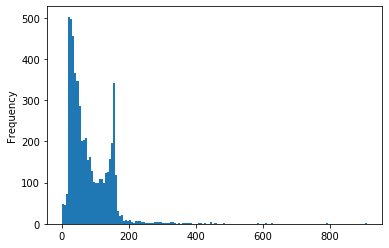

In [25]:
messages['length'].plot.hist(bins=150)

In [26]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [28]:
messages[messages['length'] == 910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [31]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [2]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

NameError: name 'messages' is not defined

# Text Pre-processing

Our main issue with our data is that it is all in text format (strings).Classification algorithms will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number.

We'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

Let's create a function that will process the string in the message column, then we can just use apply() in pandas do process all the text in the DataFrame.

First removing punctuation. We can just take advantage of Python's built-in string library to get a quick list of all the possible punctuation:

import string

In [33]:
import string

In [34]:
mess='Sample message! Notice: it has punctuation.'

In [35]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
nopunc = [c for c in mess if c not in string.punctuation]

In [37]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [38]:
from nltk.corpus import stopwords

In [40]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
x=['a','b','c']

In [42]:
'++'.join(x)

'a++b++c'

In [43]:
nopunc = ''.join(nopunc)

In [44]:
nopunc

'Sample message Notice it has punctuation'

In [45]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [47]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]

In [48]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [50]:
def text_process(mess):
    """
    1.remove punc
    2.remove stop words
    3.return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [51]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [4]:
messages['message'].head(5).apply(text_process)

NameError: name 'messages' is not defined

# Vectorization

Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [57]:
print(len(bow_transformer.vocabulary_))

11425


In [58]:
mess4 = messages['message'][3]

In [59]:
print(mess4)

U dun say so early hor... U c already then say...


In [60]:
bow4 = bow_transformer.transform([mess4])

In [61]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [62]:
print(bow4.shape)

(1, 11425)


In [63]:
bow_transformer.get_feature_names()[4068]

'U'

In [64]:
bow_transformer.get_feature_names()[9554]

'say'

In [65]:
messages_bow=bow_transformer.transform(messages['message'])

In [66]:
print('Shape of Sparse Marix:', messages_bow.shape)

Shape of Sparse Marix: (5572, 11425)


In [67]:
messages_bow.nnz

50548

In [70]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.07940295412668218


In [71]:
from sklearn.feature_extraction.text import TfidfTransformer

In [73]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [74]:
tfidf4 = tfidf_transformer.transform(bow4)

In [75]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [76]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [78]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

# Training a model

In [79]:
from sklearn.naive_bayes import MultinomialNB

In [80]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [82]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [83]:
messages['label'][3]

'ham'

# Model Evaluation

In [84]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [5]:
all_pred

NameError: name 'all_pred' is not defined

# Train Test Split

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

In [6]:
msg_train

NameError: name 'msg_train' is not defined

# Creating a pipeline

In [89]:
from sklearn.pipeline import Pipeline

In [91]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [92]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001B019CA8B88>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [93]:
predictions = pipeline.predict(msg_test)

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1460
        spam       1.00      0.67      0.80       212

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.89      1672
weighted avg       0.96      0.96      0.95      1672

